In [ ]:
# Must restart runtime after
!pip install matplotlib==3.4

In [2]:
# from pyspark.sql import SparkSession, DataFrame
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import plotly.express as px

In [ ]:
print(matplotlib.__version__)

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
pd.options.mode.chained_assignment = None

# Настройки ALS модели:
**Набор параметров**
```
params = {
    'rank':   [5, 10, 15, 20],
    'regul':  [0.1, 1, 10],
    'iter':   [5, 10, 50],
    'alpha':  [10, 20, 40]
        }

```

## Результаты настройки

In [ ]:
data_params = pd.read_csv('/content/als_parameters_result_500K.csv')

In [ ]:
data_params.sort_values('dist').head(3)

,rank,reg,iter,alpha,dist
89,20,0.1,20,40.0,1.212741
88,20,0.1,20,20.0,1.212741
87,20,0.1,20,10.0,1.212741


<AxesSubplot:ylabel='dist'>

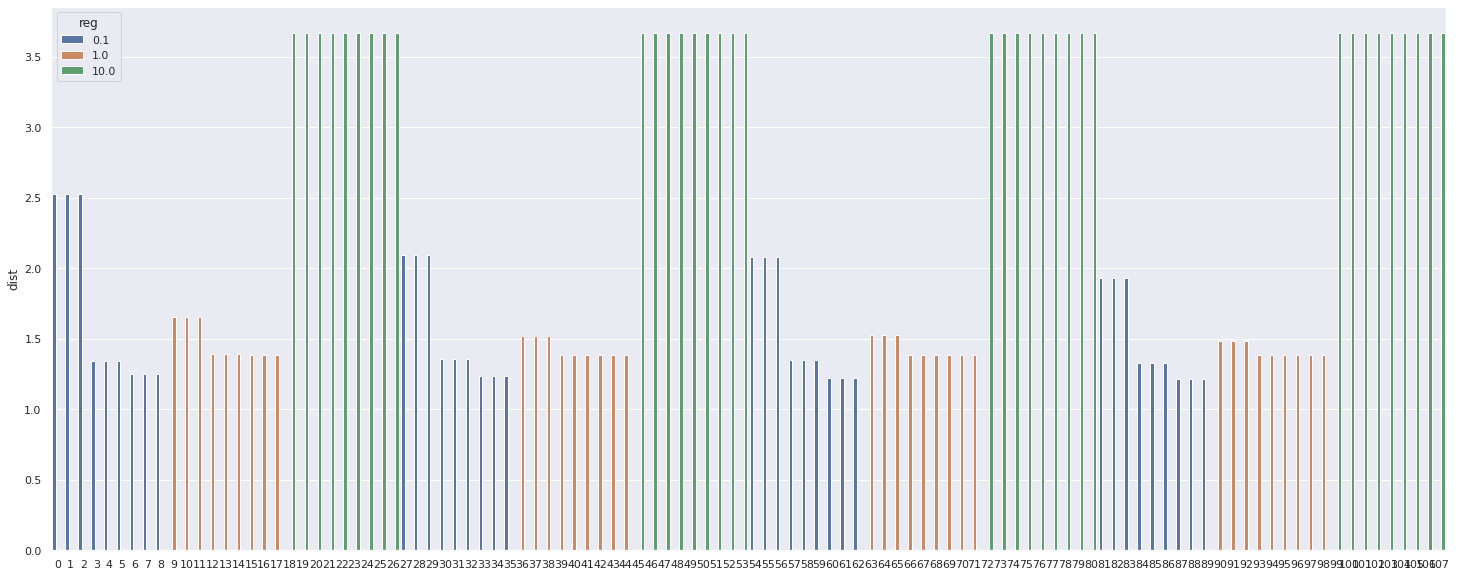

In [ ]:
sns.barplot(x=data_params.index, y="dist", hue="reg", data=data_params, estimator=sum)

Параметра alpha для данной выборки не оказывает существенного влияния на погрешсность предсказания.
Закрепим его alpha = 40

In [ ]:
data_params_alpha = data_params.query('alpha == 10')

<AxesSubplot:xlabel='rank', ylabel='dist'>

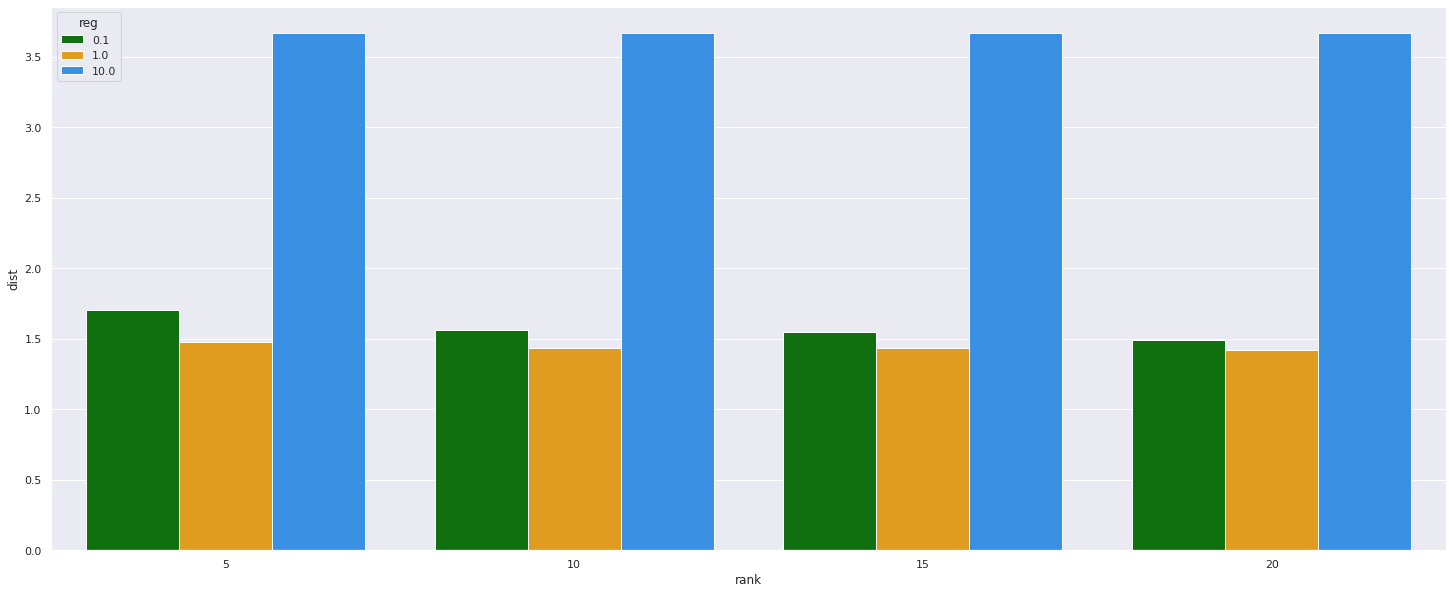

In [ ]:
sns.barplot(x="rank", y="dist", hue="reg", data=data_params_alpha, ci=None, palette=['green','orange', 'dodgerblue'])

Параметр rank для данной выворки оказывает существенное влияние на погрешность предсказания. Среднее на диаграмме среднее значение rank = 1 показывает лучший результат.
Рассмотрим данные с учётм параметра iter.

In [ ]:
# sdds

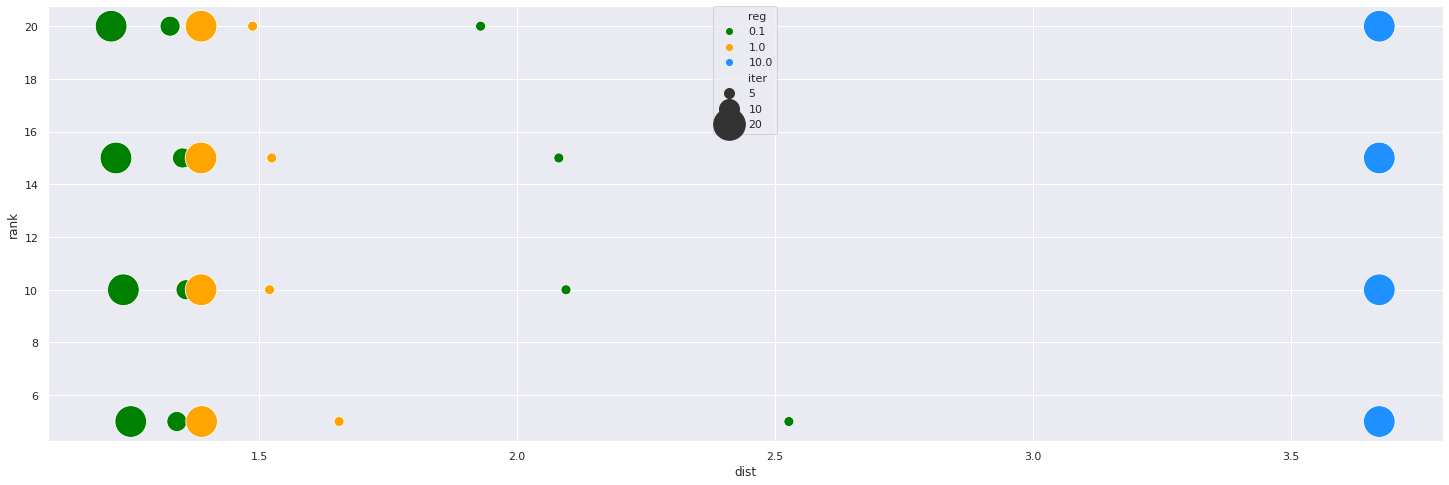

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})
g =sns.scatterplot(
    x="dist", y="rank", hue="reg", size="iter", data=data_params_alpha,
    palette=['green','orange', 'dodgerblue'], legend='full', sizes=(100, 1000),
    );
plt.legend(loc='upper center', borderaxespad=0)

С учётом влияния покзателя iter выбраны результирующие параметры для ALS модели:
```
rank	reg	  iter	alpha	
20	  0.1	  20	  10.0
```

	

## Результаты настройки ALS модели для разных размеров наборов данных

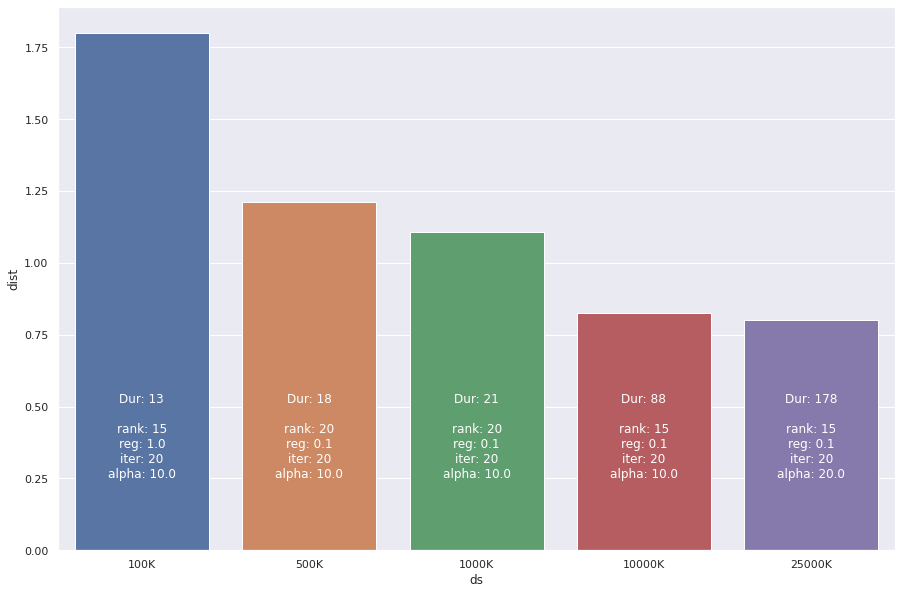

In [ ]:
data = [
    ['100K', 15, 1.0, 20, 10.0, 1.8010134243952285, 13],
    ['500K', 20, 0.1, 20, 10.0, 1.212740526862204, 18],
    ['1000K', 20, 0.1, 20, 10.0, 1.1067183000983865, 21],
    ['10000K', 15, 0.1, 20, 10.0, 0.8265532613864769, 88],
    ['25000K', 15, 0.1, 20, 20.0, 0.8025388125582774, 178],
]
columns=['ds', 'rank', 'reg', 'iter', 'alpha', 'dist', 'dur']

df_analitic = pd.DataFrame(data=data, columns=columns)

df_analitic

sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(x='ds', y="dist", data=df_analitic, ci=None)

for index, row in df_analitic.iterrows():
    ax.text(
        index,
        0.2, 
        'Dur: {0}\n \nrank: {1}\nreg: {2}\niter: {3}\nalpha: {4}\n'.format(row.dur, row['rank'], row.reg, row.iter, row.alpha), 
        color='white', 
        ha='center',
        )

Существенное повышение точностьи настройки происходит при увеличении размера датасета со 100 до 500 тысяч записей
Значение параметров настройки модели изменяетс в зависимости от испоьзуемого датасета.
В связи с этим при эксплуатации рекомендаетльной системы есть смысл переодически проводить перернастройку ALS модели на актуальных данных.
.

# Аналитика по Рекомендательной системе

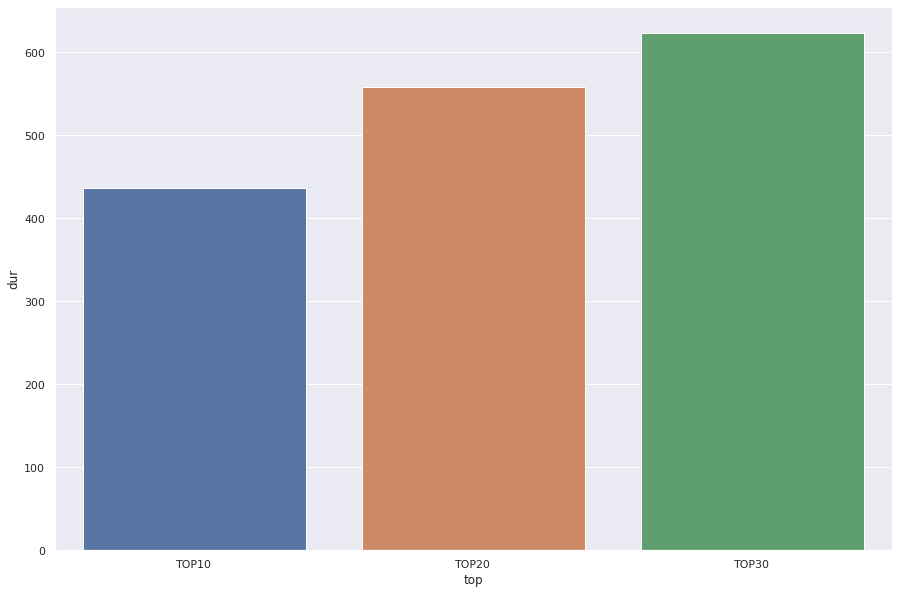

In [4]:
data = [
    ['TOP10', 437],
    ['TOP20', 558],
    ['TOP30', 624],
]
columns=['top', 'dur']

df_analitic = pd.DataFrame(data=data, columns=columns)

df_analitic

sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(x='top', y="dur", data=df_analitic, ci=None)